## PRACA DOMOWA

Pracę domową (**pojedynczy plik** notatnika z rozszerzeniem .ipynb) należy przesłać za pośrednictwem platformy *MS Teams* (moduł Zadania) do poniedziałku **11 grudnia 2023 roku do godziny 9:00**. Przesłanie rozwiązania po terminie skutkuje otrzymaniem 0 punktów za tę pracę domową.

**D1** (*1 punkt*). Wzrost nowotworu można opisać za pomocą tzw. *prawa Gomperta*:
$$N' = -a\cdot N\cdot \ln(b\cdot N),$$
gdzie $N(t)$ jest proporcjonalna do liczby komórek nowotworu, a $a,b>0$ są parametrami. Znajdź wszystkie punkty równowagi, naszkicuj pole kierunków (dla wybranych przez siebie wartości $a$ i $b$) i sklasyfikuj punkty równowagi.

**D2** (*1 punkty*). W poniższych przykładach znajdź punkty równowagi i sklasyfikuj je. W przypadkach, gdy $f'(x^*)=0$ narysuj portrety fazowe i na ich podstawie wyciągnij wnioski: 
(a) $x'=x\cdot(1-x)$, (b) $x'=x^2\cdot(6-x)$, (c) $x'=1-e^{-x^2}$.

**D3** (*2 punkty*). Sklasyfikuj punkt krytyczny $(x,y)=(0,0)$ dla układów równań $\mathbf{x}'=A\mathbf{x}$, gdzie: 
(a) $A = \begin{pmatrix}3 & -4 \\ 1 & -1\end{pmatrix}$, (b) $A = \begin{pmatrix}-3 & 2 \\ 1 & -2\end{pmatrix}$, (c) $A = \begin{pmatrix}5 & 2 \\ -17 & -5\end{pmatrix}$, (d) $A = \begin{pmatrix}-3 & 4 \\ -2 & 3\end{pmatrix}$.

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [3]:
sympy.init_printing()

## Zadanie D1

W rozwiązaniu zadania przyjmę a = 3, b = 4

N(t) opisuje liczbę komórek nowotworu w czasie, czyli $N(t) \ge 0$ i $t\ge 0$ 

In [4]:
a = 3
b = 4

In [5]:
t, N0 = sympy.symbols('t, N0')
N = sympy.Function('N')

In [6]:
f = -a*N(t)*sympy.log(b*N(t))
ode = N(t).diff(t) - f

ivp_sol = sympy.dsolve(ode, N(t), ics = {N(0):N0})
ivp_sol

Szukamy punktów równowagi naszego równania

Znajdźmy rozwiązania $ -aN(t)\ln{(bN(t))}$

In [7]:
sympy.solve(f, N(t))

Mamy dwa rozwiązania stałe: $N(t) = \frac{1}{b}$ i $N(t) = 0$

W naszym przypadku, punkty równowagi to: $N(t) = \frac{1}{4}$ i $N(t)=0$

Narysujemy pole kierunków dla naszego wykresu:

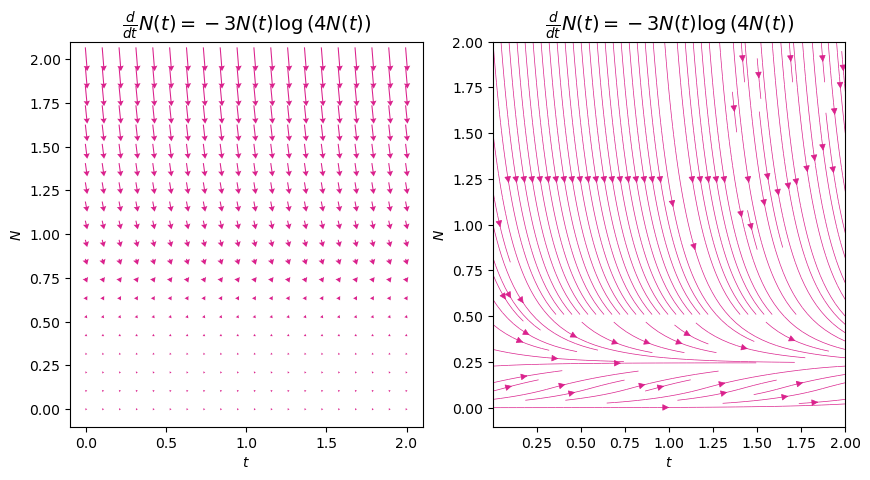

In [8]:
_, axes = plt.subplots(1, 2, figsize=(10,5))

f_np = sympy.lambdify(N(t), f, 'numpy')
t_np = np.linspace(0.00001, 2, 20)
x_np = np.linspace(0.00001, 2, 20)
T, X = np.meshgrid(t_np, x_np)
U = np.ones((20,20))
V = f_np(X)

axes[0].quiver(T, X, U, V, pivot='mid', headwidth=6, color='#DA218C')
axes[0].set_title(r"$%s$" % sympy.latex(sympy.Eq(N(t).diff(t), f)), fontsize = 14)
axes[0].set_xlabel("$t$", fontsize=10)
axes[0].set_ylabel("$N$", fontsize=10)

axes[1].streamplot(T, X, U, V, density=1.5, color='#DA218C', linewidth=0.5)
axes[1].set_title(r"$%s$" % sympy.latex(sympy.Eq(N(t).diff(t), f)), fontsize = 14)
axes[1].set_xlabel("$t$", fontsize=10)
axes[1].set_ylabel("$N$", fontsize=10)

plt.show()

Wykresy pola kierunków potwierdzają, że $N(t) = \frac{1}{4}$ i $N(t) = 0$ to punkty równowagi

Ponadto, na podstawie analizy zachowania pola kierunków w okolicach prostej N = 0.25 można określić, że punkt $\frac{1}{4}$ jest atraktorem. 
Natomiast punkt 0 jest punktem niestabilnym.
Zilustrujmy to na jeszcze jednym wykresie:


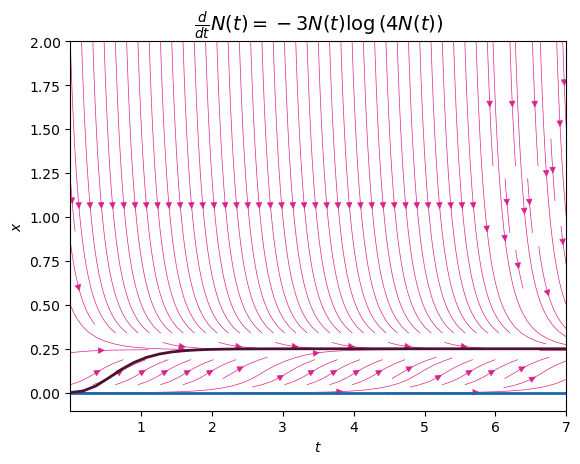

In [10]:
t_np = np.linspace(0.00001, 7, 40)
x_np = np.linspace(0.00001, 2, 20)
T, X = np.meshgrid(t_np, x_np)
U = np.ones((20,40))
V = f_np(X)

T0 = np.linspace(0.00001, 7, 40)
X0 = np.zeros((40, 1))

x01 = 0.001
X1 = np.exp((np.log(x01)+2*np.log(2))*np.exp(-3*T0))/4

plt.streamplot(T, X, U, V, density=1.5, color='#DA218C', linewidth=0.5)
plt.plot(T0, X0, '#1c67ae', lw=2)
plt.plot(T0, X1, '#4c1130', lw=2)
plt.title(r"$%s$" % sympy.latex(sympy.Eq(N(t).diff(t), f)), fontsize = 14)
plt.xlabel("$t$", fontsize=10)
plt.ylabel("$x$", fontsize=10)

plt.show()

## Zadanie D2

In [11]:
x = sympy.symbols('x')

W zadaniu skorzystam z następującego twierdzenia z ćwiczeń:

**Tw.** Jeżeli $x^*$ jest punktem równowagi równania $x'=f(x)$ i $f$ jest klasy $C^1$, to:
1. jeśli $f'(x^*)<0$, to $x^*$ jest lokalnie asymptotycznie stabilny (jest tzw. ściekiem),
2. jeśli $f'(x^*)>0$, to $x^*$ jest niestabilny (jest tzw. źródłem).

a) $x'=x(1-x)$

Zacznijmy od wyznaczenia punktów równowagi:

In [12]:
sympy.solve(x*(1-x),x)

In [13]:
f = x*(1-x)
F = f.diff(x)
F

In [14]:
F.subs(x, 0)

In [15]:
F.subs(x,1)

Na podstawie przytoczonego twierdzenia możemy określić, że $x^*=1$ jest lokalnie asymptotycznie stabilny - jest ściekiem, natomiast $x^*=0$ jest niestabilny - jest źródłem. Narysujmy jeszcze pole kierunków dla naszego równania.

Text(0, 0.5, '$x$')

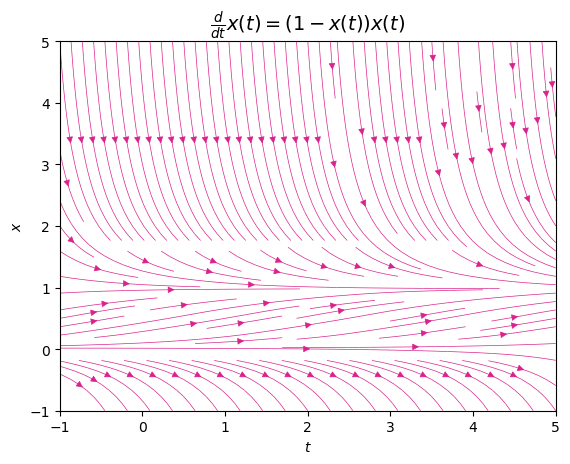

In [19]:
t = sympy.symbols('t')
x = sympy.Function('x')

f1 = x(t)*(1-x(t))

f_np = sympy.lambdify(x(t), f1, 'numpy')
t_np = np.linspace(-1, 5, 20)
x_np = np.linspace(-1, 5, 20)
T, X = np.meshgrid(t_np, x_np)
U = np.ones((20,20))
V = f_np(X)

# wyświetlenie wykresu
plt.streamplot(T, X, U, V, density=1.5, color='#DA218C', linewidth=0.5)
plt.title(r"$%s$" % sympy.latex(sympy.Eq(x(t).diff(t), f1)), fontsize = 14)
plt.xlabel("$t$", fontsize=10)
plt.ylabel("$x$", fontsize=10)

Wykres potwierdza rozważania teoretyczne

In [20]:
x = sympy.symbols('x')

b) $x' = x^2(6-x)$

Zacznijmy od wyznaczenia punktów równowagi

In [21]:
sympy.solve((x**2)*(6-x),x)

In [22]:
f = (x**2)*(6-x)
F = f.diff(x)
F

In [23]:
F.subs(x,0)

In [24]:
F.subs(x,6)

Na podstawie twierdzenia możemy stwierdzić, że punkt $x^* = 6$ jest lokalnie asymptotycznie stabilny - jest ściekiem. Aby sklasyfikować punkt $x^* = 0$ musimy posłużyć się wykresem jako, że $f'(0)=0$

Text(0, 0.5, "$x'$")

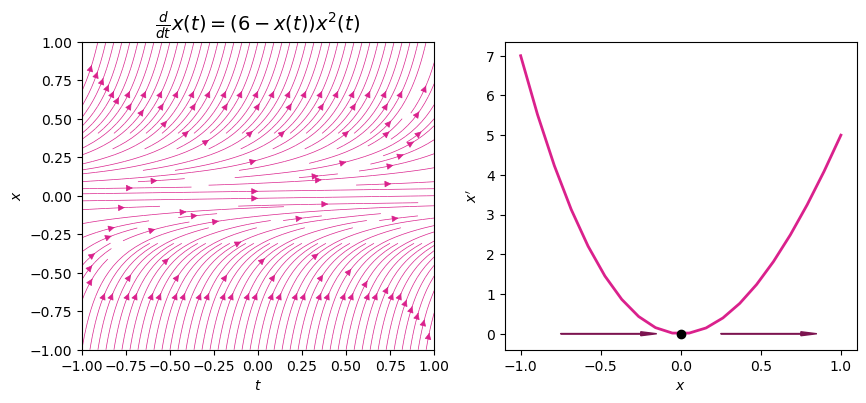

In [25]:
t = sympy.symbols('t')
x = sympy.Function('x')
_, axes = plt.subplots(1, 2, figsize=(10,4))

f2 = (x(t)**2)*(6-x(t))

f_np = sympy.lambdify(x(t), f2, 'numpy')
t_np = np.linspace(-1, 1, 20)
x_np = np.linspace(-1, 1, 20)
T, X = np.meshgrid(t_np, x_np)
U = np.ones((20,20))
V = f_np(X)

# wyświetlenie wykresu
axes[0].streamplot(T, X, U, V, density=1.5, color='#DA218C', linewidth=0.5)
axes[0].set_title(r"$%s$" % sympy.latex(sympy.Eq(x(t).diff(t), f2)), fontsize = 14)
axes[0].set_xlabel("$t$", fontsize=10)
axes[0].set_ylabel("$x$", fontsize=10)

f_np = sympy.lambdify(x(t), f2, 'numpy')
t_np = np.linspace(-1, 1, 20)
x_np = np.linspace(-1, 1, 20)
T, X = np.meshgrid(t_np, x_np)
U = np.ones((20,20))
V = f_np(X)

axes[1].plot(x_np, f_np(x_np), '#DA218C', lw=2)
axes[1].plot(0, 0, 'ko')
axes[1].arrow(-0.75, 0,  0.5, 0, width=0.01, head_width=0.1, head_length=0.1, color = "#7c1450")
axes[1].arrow( 0.25, 0,  0.5, 0, width=0.01, head_width=0.1, head_length=0.1, color = "#7c1450")
axes[1].set_xlabel("$x$", fontsize=10)
axes[1].set_ylabel("$x'$", fontsize=10)

Otrzymujemy, że punkt $x^*=0$ jest punktem półstabilnym

In [26]:
x = sympy.symbols('x')

c) $x' = 1-e^{-x^2}$

Zacznijmy od wyznaczenia punktów równowagi

In [27]:
sympy.solve(1-sympy.exp((-x)**2),x)

In [28]:
f = 1-sympy.exp((-x)**2)
F = f.diff(x)
F

In [30]:
F.subs(x,0)

Aby sklasyfikować punkt $x^* = 0$ musimy posłużyć się wykresem jako, że $f'(0)=0$

Text(0, 0.5, "$x'$")

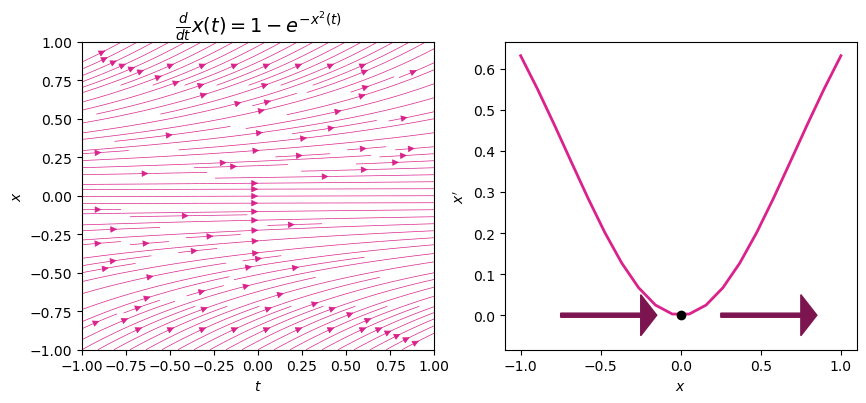

In [31]:
t = sympy.symbols('t')
x = sympy.Function('x')
_, axes = plt.subplots(1, 2, figsize=(10,4))


f3 = 1-sympy.exp(-(x(t)**2))

f_np = sympy.lambdify(x(t), f3, 'numpy')
t_np = np.linspace(-1, 1, 20)
x_np = np.linspace(-1, 1, 20)
T, X = np.meshgrid(t_np, x_np)
U = np.ones((20,20))
V = f_np(X)

# wyświetlenie wykresu
axes[0].streamplot(T, X, U, V, density=1.5, color='#DA218C', linewidth=0.5)
axes[0].set_title(r"$%s$" % sympy.latex(sympy.Eq(x(t).diff(t), f3)), fontsize = 14)
axes[0].set_xlabel("$t$", fontsize=10)
axes[0].set_ylabel("$x$", fontsize=10)

axes[1].plot(x_np, f_np(x_np), '#DA218C', lw=2)
axes[1].plot(0, 0, 'ko')
axes[1].arrow(-0.75, 0,  0.5, 0, width=0.01, head_width=0.1, head_length=0.1, color = "#7c1450")
axes[1].arrow( 0.25, 0,  0.5, 0, width=0.01, head_width=0.1, head_length=0.1, color = "#7c1450")
axes[1].set_xlabel("$x$", fontsize=10)
axes[1].set_ylabel("$x'$", fontsize=10)

Na podstawie powyższych wykresów możemy stwierdzić, że punkt $x^*=0$ jest punktem półstabilnym

## Zadanie D3

a) $A = \begin{pmatrix}3 & -4 \\ 1 & -1\end{pmatrix}$

In [32]:
A = np.array([[3,-4],[1,-1]])

In [33]:
valuesE = LA.eigvals(A)
valuesE

array([1., 1.])

Mamy dwie rzeczywiste, dodatnie wartości własne.

Punkt krytyczny (punkt równowagi) jest niestabilny - tzw źródło.

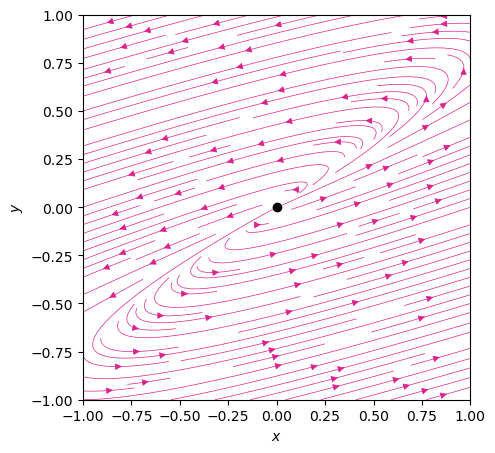

In [34]:
x_np = np.linspace(-1, 1, 20)
y_np = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x_np, y_np)
U = A[0,0]*X+A[0,1]*Y
V = A[1,0]*X+A[1,1]*Y

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, U, V, density=1.5, color='#DA218C', linewidth=0.5)
plt.plot(0, 0, 'ko')
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)

plt.show()

(b) $A = \begin{pmatrix}-3 & 2 \\ 1 & -2\end{pmatrix}$

In [35]:
A = np.array([[-3,2],[1,-2]])

In [36]:
valuesE = LA.eigvals(A)
valuesE

array([-4., -1.])

Mamy dwie rzeczywiste, ujemne wartości własne.

Punkt równowagi jest stabilny - ściek

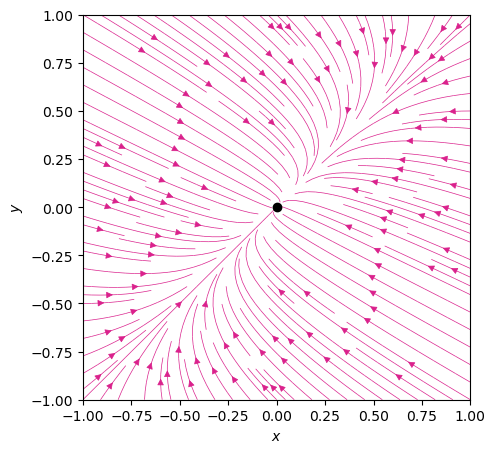

In [37]:
x_np = np.linspace(-1, 1, 20)
y_np = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x_np, y_np)
U = A[0,0]*X+A[0,1]*Y
V = A[1,0]*X+A[1,1]*Y

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, U, V, density=1.5, color='#DA218C', linewidth=0.5)
plt.plot(0, 0, 'ko')
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)

plt.show()

(c) $A = \begin{pmatrix}5 & 2 \\ -17 & -5\end{pmatrix}$

In [38]:
A = np.array([[5,2],[-17,-5]])

In [39]:
valuesE = LA.eigvals(A)
valuesE

array([-4.4408921e-16+3.j, -4.4408921e-16-3.j])

Mamy dwie zespolone wartości własne o ujemnej części rzeczywistej

Punkt równowagi jest stabilny - spiralny ściek

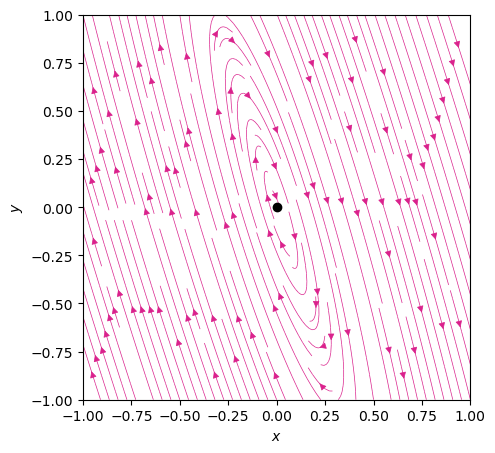

In [40]:
x_np = np.linspace(-1, 1, 20)
y_np = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x_np, y_np)
U = A[0,0]*X+A[0,1]*Y
V = A[1,0]*X+A[1,1]*Y

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, U, V, density=1.5, color='#DA218C', linewidth=0.5)
plt.plot(0, 0, 'ko')
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)

plt.show()

(d) $A = \begin{pmatrix}-3 & 4 \\ -2 & 3\end{pmatrix}$

In [41]:
A = np.array([[-3,4],[-2,3]])

In [42]:
valuesE = LA.eigvals(A)
valuesE

array([-1.,  1.])

Mamy dwie rzeczywiste wartości własne przeciwnych znaków.

Punkt krytyczny (równowagi) jest niestabilny - siodło

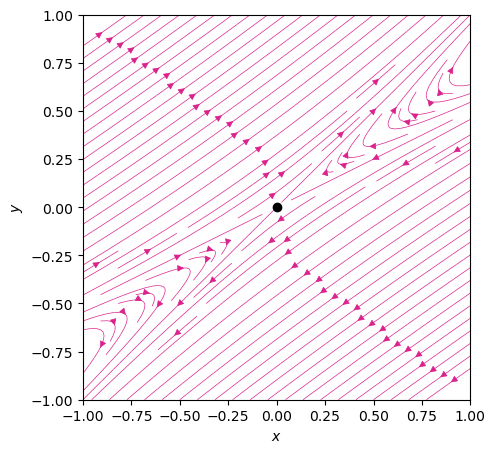

In [43]:
x_np = np.linspace(-1, 1, 20)
y_np = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x_np, y_np)
U = A[0,0]*X+A[0,1]*Y
V = A[1,0]*X+A[1,1]*Y

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, U, V, density=1.5, color='#DA218C', linewidth=0.5)
plt.plot(0, 0, 'ko')
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)

plt.show()